In [1]:
import imagej
import collections
import net_segment.DetectObject as do
import tensorflow as tf
import tensorflow_hub as hub
import tooled.image as ti
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as util_ops

%matplotlib inline

# setup logger
tf.get_logger().setLevel('ERROR')

# initialize imagej
ij = imagej.init(headless=False)
print(f"ImageJ version: {ij.getVersion()}")

# get data
img = do.open_image(ij, resize_width=1024, resize_height=1024, path='sample-data/test_8bit_1024.tif')

# create detector
model = "https://tfhub.dev/tensorflow/efficientdet/d0/1"
print("Loading model...")
detector = hub.load(model)
print("Model loaded.")
output = detector(img)

2021-11-03 19:37:31.434878: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/edward/Documents/software/anaconda/envs/pyijdev/lib/python3.8/site-packages/cv2/../../lib64:
2021-11-03 19:37:31.434893: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
log4j:WARN No appenders could be found for logger (org.bushe.swing.event.EventService).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.


ImageJ version: 2.3.0/1.53f
Loading model...


2021-11-03 19:37:37.788263: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/edward/Documents/software/anaconda/envs/pyijdev/lib/python3.8/site-packages/cv2/../../lib64:
2021-11-03 19:37:37.788281: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-03 19:37:37.788295: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (index): /proc/driver/nvidia/version does not exist
2021-11-03 19:37:37.788405: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler

Model loaded.


2021-11-03 19:38:05.110772: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [2]:
results = do.get_model_results(output)
print(results.keys())
boxes = results['detection_boxes']
scores = results['detection_scores']
num_detections = results['num_detections']

dict_keys(['detection_scores', 'detection_classes', 'num_detections', 'raw_detection_boxes', 'detection_boxes', 'detection_multiclass_scores', 'raw_detection_scores', 'detection_anchor_indices'])


ymin: 0.0
xmin: 0.0
ymax: 1.0
xmax: 1.0
ymin: 0.1007208451628685
xmin: 0.932243824005127
ymax: 0.16303133964538574
xmax: 0.9843878746032715


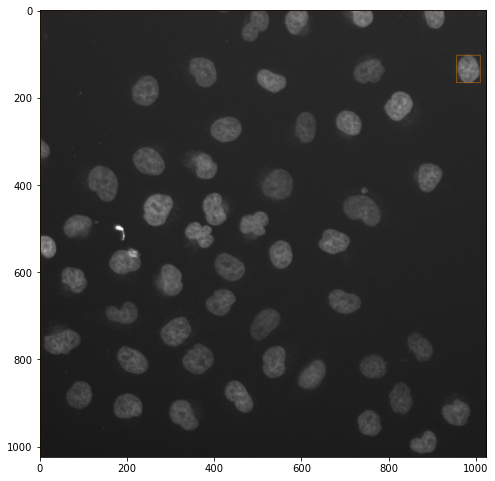

In [10]:
pil_image = Image.fromarray(img[0])
min_score_thresh = 0.2

# extract boxes
box_to_color_map = collections.defaultdict(str)

for i in range(boxes.shape[0]):
    box = tuple(boxes[i].tolist())

for i in range(scores.shape[0]):
    score = tuple(scores[i].tolist())

# draw all boxes (default color 'DarkOrange'
for i in range(len(box)):
    if score[i] >= min_score_thresh:
        ymin, xmin, ymax, xmax = box[i]
        print(f"ymin: {ymin}\nxmin: {xmin}\nymax: {ymax}\nxmax: {xmax}")
        do.draw_bounding_box(pil_image, ymin=ymin, xmin=xmin, ymax=ymax, xmax=xmax, color='DarkOrange', thickness=1,font=ImageFont.load_default())

plt.figure(figsize=(8, 10))
plt.imshow(pil_image)
plt.show()
